# Lab: Classification

## 1.Learning objectives



1.   Learn to train a feedforward neural network
2.   Experiment with different activation functions and network structures

## 2. The Keras library

Keras is an open-source Python library for deep learning. Keras contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools for working with image and text data. We will use this library to implement the feedforward neural network.


In [1]:
#import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2024-11-06 19:10:35.839771: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 19:10:35.844052: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 19:10:35.856314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730916635.875093   12324 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730916635.880514   12324 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 19:10:35.897548: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# 3. Loading the MNIST dataset
 The MNIST dataset consists of 28x28 grayscale images of digits (0-9). Each pixel has a value from 0 to 255 (1 color channel) We are going to turn each image into a single input vector (each pixel will be a feature). We will also normalize the features to be between 0 and 1.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

# Reshape the data to a flat vector of 784 pixels for each image
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

print(f"Training data shape: {x_train.shape}, Test data shape: {x_test.shape}")

Training data shape: (60000, 784), Test data shape: (10000, 784)


# 4. Build a Feedforward Neural Network
 Create a simple neural network with one hidden layer of 128 neurons and ReLU activation. The output layer should have 10 neurons with softmax activation (for 10 digit classes).


In [3]:
#Specify model architecture

model = keras.Sequential() # Sequential groups a linear stack of layers into a Model
model.add(keras.Input(shape=(784,))) # Input specifies the shape of the input

#Dense implements the operation: output = activation(dot(input, kernel) + bias). Dense layers mean every node is connected to every previous node.
model.add(keras.layers.Dense(128, activation='relu')) 
#model.add(keras.layers.Dense(128, activation='tanh'))
#model.add(keras.layers.Dense(128, activation='sigmoid'))

model.add(keras.layers.Dense(10, activation='softmax')) # It's important to leave the last activation as softmax, this ensures the output are probabilities that sum to 1.



#Compiling the model configures it for training. You can specify optimization method, loss function, list of metrics to be evaluated by the model during training and testing, etc.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2024-11-06 19:10:38.482189: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Train the model for 10 epochs and plot the accuracy and loss over epochs.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8775 - loss: 0.4372 - val_accuracy: 0.9618 - val_loss: 0.1349
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9630 - loss: 0.1232 - val_accuracy: 0.9704 - val_loss: 0.0955
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9772 - loss: 0.0792 - val_accuracy: 0.9741 - val_loss: 0.0867
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0557 - val_accuracy: 0.9754 - val_loss: 0.0838
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9861 - loss: 0.0434 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0336 - val_accuracy: 0.9791 - val_loss: 0.0675
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9781 - val_loss: 0.0704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9937 - loss: 0.0203 - 

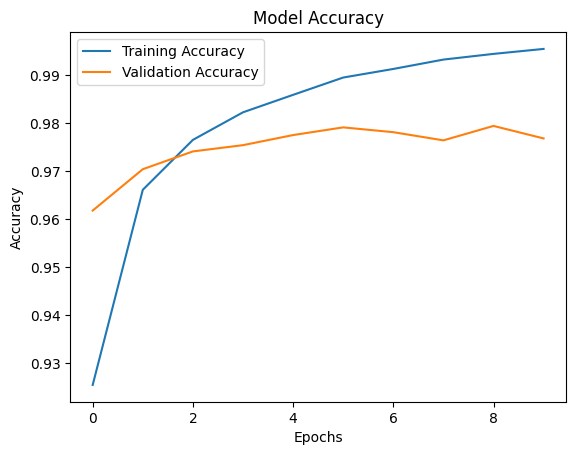

In [4]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can plot the decision boundaries, although it may be difficult to interpret since each point has many dimensions (as many as pixels) and so we need to reduce the data.

523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


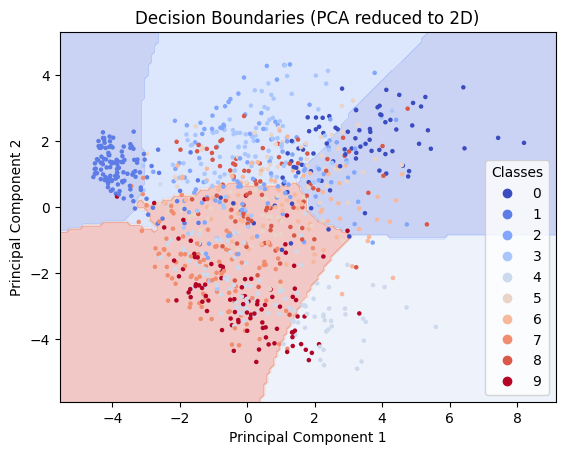

In [5]:
from sklearn.decomposition import PCA
def plot_decision_boundary(model, x, y):
    # Apply PCA to reduce data to 2D for visualization
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x)

    # Get min and max values for creating grid
    x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
    y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1

    # Create a mesh grid for plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict for each point on the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_pca = pca.inverse_transform(grid_points)  # Transform back to original space
    preds = np.argmax(model.predict(grid_points_pca), axis=1) #note the the model predicts a probability, and we use argmax to return which class the highes probability belongs to
    preds = preds.reshape(xx.shape)

    # Plot decision boundary and samples
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, s=5, cmap=plt.cm.coolwarm)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title("Decision Boundaries (PCA reduced to 2D)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Plot decision boundary
plot_decision_boundary(model, x_test[:1000], y_test[:1000])  # Use a subset for clarity

* Considering the accuracy and the time computation takes, does it make sense to train for 10 epochs?

Yes it make sense, but if we try to train for 9 epochs it will be a better accuracy and also a lower time computation. Because if we observe the Model Accuracy plot at the final the validation accuracy decrease. We can see this better from the following output:

Epochs 9 - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9799 - val_loss: 0.0693

Epochs 10 - accuracy: 0.9965 - loss: 0.0131 - val_accuracy: 0.9763 - val_loss: 0.0849

Even so, the difference is minimal so we can say that 10 epochs is good. The time computations are almost the same between 9 or 10 epochs.

## 5. Experiment with activation functions

Change the activation function of the hidden layer to `tanh` and `sigmoid`, re-train the model, and compare the results in terms of performance and boundary shapes.



The results of changing the activation function are similar but with some differences. 
For one hand, using tanh compare with relu are performing a little bit better both in time computation and accuracy. Then if we use sigmoid the performance of accuracy are worst than relu and tanh, only in time computation and validation accuracy are similar than the other two.

In terms of boundary shapes are difference in general, but for relu and tanh they predominate over the others. but that don't happens using sigmoid activation function.

## 6. Experiment with different architectures

 Change the number of neurons in the hidden layer. Try adding one or two additional hidden layers (e.g., Dense(64), Dense(32)) and observe the changes in performance.




When change the number of neurons in the hidden layer we lost a little bit of accuracy as we reduce the Dense.



# 7. Visualising the model

To see how each different architecture behaves, we can visualise the different layers and their activations.

Firstly, plot_model allows you to visualise your chosen architecture.

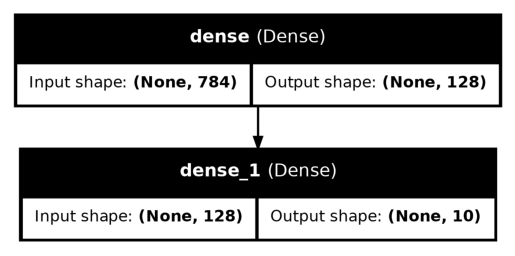

In [6]:
from sklearn.manifold import TSNE
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file="model_structure.png")
plt.imshow(plt.imread("model_structure.png"))
plt.axis('off')
plt.show()

You can retrieve each layer independently and observe the weights.

In [7]:

model.get_layer('dense').get_weights()

model.get_layer('dense_1').get_weights()

[array([[-0.32302907,  0.2183232 , -0.04640598, ..., -0.24814592,
          0.23557924,  0.23088497],
        [ 0.25783756,  0.03687892, -0.7649278 , ...,  0.65513843,
         -0.22968858, -0.3673853 ],
        [-0.09950861, -0.4530387 ,  0.23201878, ..., -0.0743796 ,
         -0.5968507 ,  0.00450286],
        ...,
        [-0.03230369,  0.21204896,  0.4178149 , ..., -0.17395097,
         -0.11699046, -0.20536272],
        [-0.6225943 ,  0.36984694,  0.22817056, ..., -0.18960984,
          0.03164067,  0.19411504],
        [-0.66621995, -0.41330358, -0.04739559, ..., -0.45417243,
          0.2780948 , -0.02968372]], dtype=float32),
 array([-0.10780232, -0.14521489, -0.04279607, -0.08906884,  0.10716929,
         0.05648201,  0.02961094, -0.10994465,  0.20542453,  0.01650479],
       dtype=float32)]